In [8]:
include("../../src/repeat_testing_scenarios.jl")
using DataFrames
using StatsPlots
using CSV

In [9]:
Ntot = 100000
Nscens = length(scen_names)

7

In [10]:
scenarios, names = run_testing_scenarios_impact(Ntot, 1.0, 0.7, false)
dfh_noconf = DataFrame(Scenario=repeat(names,Ntot),InfDays=zeros(Nscens*Ntot),InfPot=zeros(Nscens*Ntot))
for i in 1:Ntot
    for j in 1:Nscens
        dfh_noconf["InfDays"][Nscens*(i-1)+j] = scenarios[j]["inf_days"][i]
        dfh_noconf["InfPot"][Nscens*(i-1)+j] = sum(scenarios[j]["inf_profile_isolation"][i])
    end
end

scen_means_noconf = zeros(Nscens)
scen_iprs_noconf = zeros(Nscens)
for j in 1:Nscens
    scen_means_noconf[j] = mean(scenarios[j]["inf_days"])
    scen_iprs_noconf[j] = mean(dfh_noconf["InfPot"][dfh_noconf["Scenario"] .== names[j]])
end

In [11]:
CSV.write("no_confPCR_Pisol100_LFDcomp70.csv",dfh_noconf)

"no_confPCR_Pisol100_LFDcomp70.csv"

In [12]:
scenarios, names = run_testing_scenarios_impact(Ntot, 1.0, 0.7, true)
dfh_conf = DataFrame(Scenario=repeat(names,Ntot),InfDays=zeros(Nscens*Ntot),InfPot=zeros(Nscens*Ntot))
for i in 1:Ntot
    for j in 1:Nscens
        dfh_conf["InfDays"][Nscens*(i-1)+j] = scenarios[j]["inf_days"][i]
        dfh_conf["InfPot"][Nscens*(i-1)+j] = sum(scenarios[j]["inf_profile_isolation"][i])
    end
end


scen_means_conf = zeros(Nscens)
scen_iprs_conf = zeros(Nscens)

for j in 1:Nscens
    scen_means_conf[j] = mean(scenarios[j]["inf_days"])
    IPh = dfh_conf["InfPot"][dfh_conf["Scenario"] .== names[j]]
    scen_iprs_conf[j] = mean(IPh)
end

In [13]:
CSV.write("confPCR_Pisol100_LFDcomp70.csv",dfh_conf)

"confPCR_Pisol100_LFDcomp70.csv"

In [14]:
plot(0:(inf_len-1),transpose(mean(all_infs,dims=1)),marker=:square,label="Infectiousness",linewidth=2)
plot!(0:(inf_len-1),transpose(mean(all_symp_infs,dims=1)),marker=:circle,label="With Symp. Isol",linewidth=2)
plot!(0:(inf_len-1),transpose(mean(all_sQ_infs,dims=1)),marker=:cross, label="Status Quo",linewidth=2)
plot!(0:(inf_len-1),transpose(mean(all_2LFD_infs,dims=1)), label="2 LFDs", 
    xlim=(0,30),ylim=(0,0.6), xlabel="Days since infection", marker=:x,
    ylabel="Fraction infectious",linewidth=2,size=(600,375))

savefig("infectiousness.png")

LoadError: [91mUndefVarError: inf_len not defined[39m

In [15]:
scenarios, names = run_testing_scenarios_impact(Ntot, 1.0, 0.7, false; LFD_type=2)
dfh_noconf_LFD2 = DataFrame(Scenario=repeat(names,Ntot),InfDays=zeros(Nscens*Ntot),InfPot=zeros(Nscens*Ntot))
for i in 1:Ntot
    for j in 1:Nscens
        dfh_noconf_LFD2["InfDays"][Nscens*(i-1)+j] = scenarios[j]["inf_days"][i]
        dfh_noconf_LFD2["InfPot"][Nscens*(i-1)+j] = sum(scenarios[j]["inf_profile_isolation"][i])
    end
end

scen_means_noconf_LFD2 = zeros(Nscens)
scen_iprs_noconf_LFD2 = zeros(Nscens)
for j in 1:Nscens
    scen_means_noconf_LFD2[j] = mean(scenarios[j]["inf_days"])
    scen_iprs_noconf_LFD2[j] = mean(dfh_noconf_LFD2["InfPot"][dfh_noconf_LFD2["Scenario"] .== names[j]])
end

In [16]:
CSV.write("no_confPCR_Pisol100_LFDcomp70_LFD2.csv",dfh_noconf_LFD2)

"no_confPCR_Pisol100_LFDcomp70_LFD2.csv"

In [24]:
scenarios, names = run_testing_scenarios_impact(Ntot, 1.0, 0.7, true; LFD_type=2)
dfh_conf_LFD2 = DataFrame(Scenario=repeat(names,Ntot),InfDays=zeros(Nscens*Ntot),InfPot=zeros(Nscens*Ntot))
for i in 1:Ntot
    for j in 1:Nscens
        dfh_conf_LFD2["InfDays"][Nscens*(i-1)+j] = scenarios[j]["inf_days"][i]
        dfh_conf_LFD2["InfPot"][Nscens*(i-1)+j] = sum(scenarios[j]["inf_profile_isolation"][i])
    end
end

scen_means_conf_LFD2 = zeros(Nscens)
scen_iprs_conf_LFD2 = zeros(Nscens)
for j in 1:Nscens
    scen_means_conf_LFD2[j] = mean(scenarios[j]["inf_days"])
    scen_iprs_conf_LFD2[j] = mean(dfh_conf_LFD2["InfPot"][dfh_conf_LFD2["Scenario"] .== names[j]])
end

In [25]:
CSV.write("confPCR_Pisol100_LFDcomp70_LFD2.csv",dfh_conf_LFD2)

"confPCR_Pisol100_LFDcomp70_LFD2.csv"

In [20]:
inf_len = max(length.(scenarios[6]["infection_profiles"])...)
VL_len = max(length.(scenarios[6]["VL_profiles"])...)
all_infs = zeros(Float64,(Ntot,inf_len))
all_symp_infs = zeros(Float64,(Ntot,inf_len))
all_sQ_infs = zeros(Float64,(Ntot,inf_len))
all_2LFD_infs = zeros(Float64,(Ntot,inf_len))
all_DailyLFD_infs = zeros(Float64,(Ntot,inf_len))
all_PCR = zeros(Float64,(Ntot,VL_len))
all_LFD = zeros(Float64,(Ntot,VL_len))
all_LFD2 = zeros(Float64,(Ntot,VL_len))
for i in 1:Ntot
    all_infs[i,1:length(scenarios[7]["infection_profiles"][i])] = 
                      scenarios[7]["infection_profiles"][i]
    all_symp_infs[i,1:length(scenarios[7]["inf_profile_isolation"][i])] = 
                      scenarios[7]["inf_profile_isolation"][i]
    all_sQ_infs[i,1:length(scenarios[1]["inf_profile_isolation"][i])] = 
                      scenarios[1]["inf_profile_isolation"][i]
    all_2LFD_infs[i,1:length(scenarios[5]["inf_profile_isolation"][i])] = 
                      scenarios[5]["inf_profile_isolation"][i]
    all_DailyLFD_infs[i,1:length(scenarios[6]["inf_profile_isolation"][i])] = 
                      scenarios[6]["inf_profile_isolation"][i]
    all_PCR[i,1:length(scenarios[7]["VL_profiles"][i])] = 
                      PCRtest_positive_prob.(scenarios[7]["VL_profiles"][i])
    all_LFD[i,1:length(scenarios[7]["VL_profiles"][i])] = 
                      LFDtest_positive_prob1.(scenarios[7]["VL_profiles"][i])
    all_LFD2[i,1:length(scenarios[7]["VL_profiles"][i])] = 
                      LFDtest_positive_prob2.(scenarios[7]["VL_profiles"][i])
end

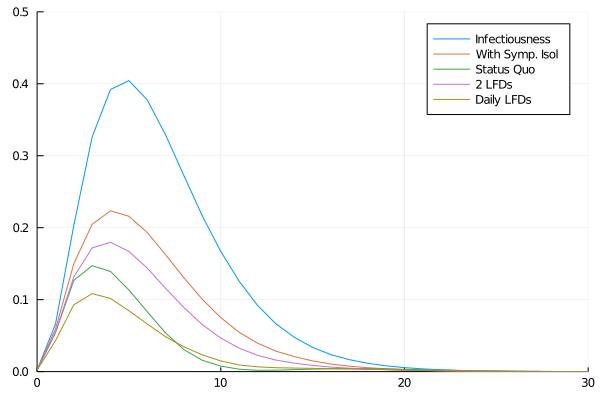

In [21]:
plot(0:(inf_len-1),transpose(mean(all_infs,dims=1)),label="Infectiousness")
plot!(0:(inf_len-1),transpose(mean(all_symp_infs,dims=1)),label="With Symp. Isol")
plot!(0:(inf_len-1),transpose(mean(all_sQ_infs,dims=1)), label="Status Quo")
plot!(0:(inf_len-1),transpose(mean(all_2LFD_infs,dims=1)), label="2 LFDs", xlim=(0,30),ylim=(0,0.5))
plot!(0:(inf_len-1),transpose(mean(all_DailyLFD_infs,dims=1)), label="Daily LFDs", xlim=(0,30),ylim=(0,0.5))

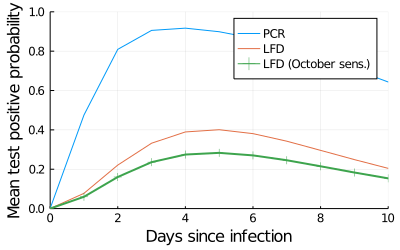

In [22]:
plot(0:(VL_len-1),transpose(mean(all_PCR,dims=1)),label="PCR")
plot!(0:(VL_len-1),transpose(mean(all_LFD,dims=1)),label="LFD")
plot!(0:(VL_len-1),transpose(mean(all_LFD2,dims=1)),xlim=(0,10),
    label="LFD (October sens.)",ylim=(0,1),linewidth=2,marker=:+,size=(400,250),
    xlabel="Days since infection",ylabel="Mean test positive probability")

4.83758

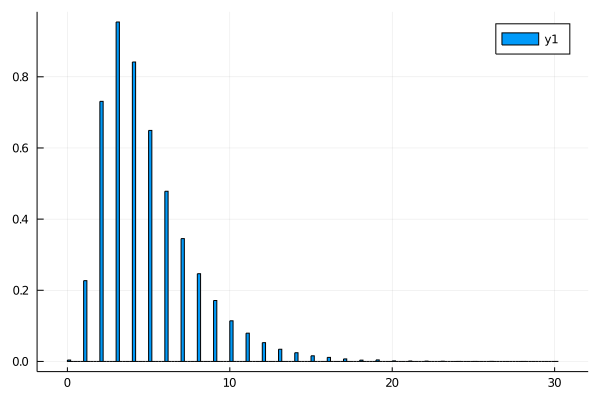

In [23]:
print(mean(scenarios[6]["symp_day"]))
histogram(scenarios[6]["symp_day"],normalize=true)

In [15]:
# max_inf = zeros(scenarios[6]["Ntot"])
# for i in 1:scenarios[6]["Ntot"]
#     max_inf[i] = max(scenarios[6]["infection_profiles"][i]...)
# end
# scatter(scenarios[6]["VL_mag"],max_inf)

In [16]:
meand = 45
beta = 0.15
test_dist = Gamma(meand*beta,1/beta)
x = 0:1:100
print(median(test_dist))

42.79835217646057

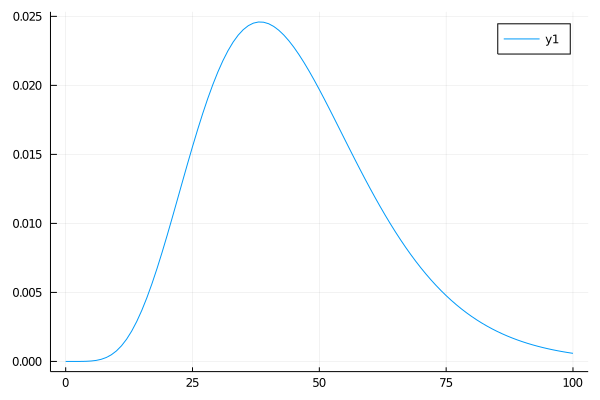

In [17]:
plot(x, pdf(test_dist,x))

In [21]:
print(mean(PTdist),' ',std(PTdist))

3.4999999999999996 2.23606797749979

In [22]:
print(mean(DTsympdist),' ',std(DTsympdist))

10.5 5.916079783099616

In [23]:
print(mean(DTasympdist),' ',std(DTasympdist))

6.699999999999999 4.725815626252608

In [3]:
print(mean(Gamma(6.75,20/3)),' ',std(Gamma(6.75,20/3)))

45.0 17.320508075688775

9.156732875069393e6 433653.0199002855


┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots /Users/carlwhitfield/.julia/packages/Plots/SjqWU/src/args.jl:1242


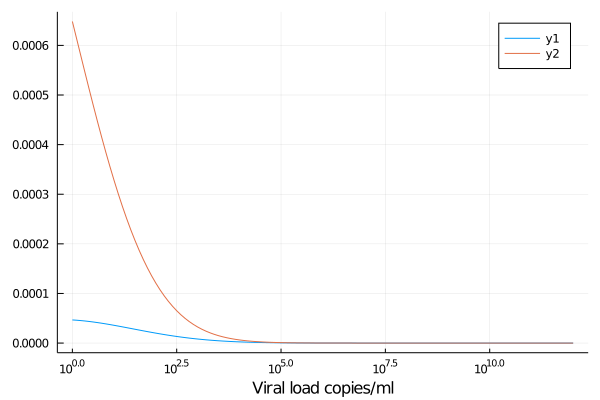

In [73]:
x = 10 .^(collect(0.0:0.1:12))

print(exp(16.03),' ',exp(12.98),'\n')
plot(x,pdf(LogNormal(16.03,4.1),x))
plot!(x,pdf(LogNormal(12.98,4.1),x),xlabel="Viral load copies/ml",xscale=:log)


365.0374678653289 73.69979369959579


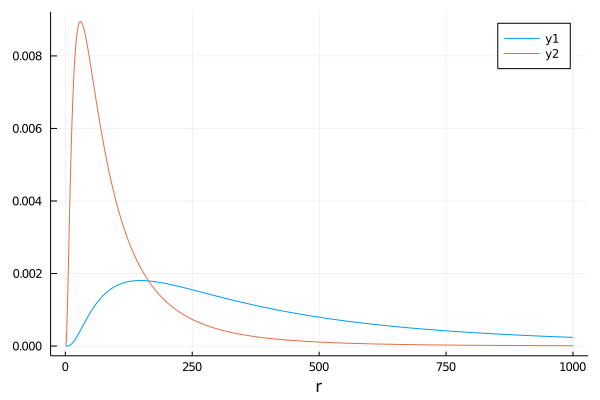

In [75]:
x = 1.0:1.0:1000
print(exp(5.9),' ',exp(4.3),'\n')

plot(x, pdf(LogNormal(5.9,0.95),x))
plot!(x, pdf(LogNormal(4.3,0.95),x),xlabel="r")

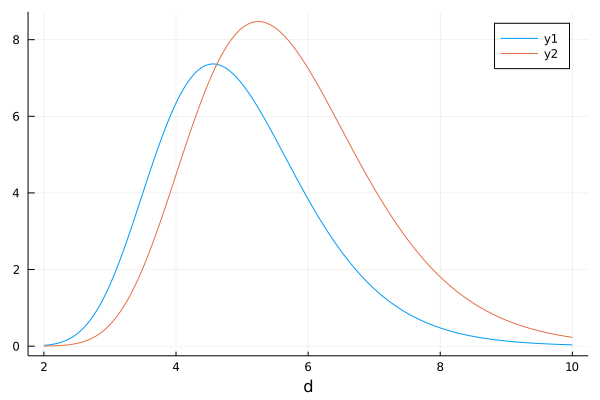

In [76]:
x = 0.1:0.001:0.5
plot(1 ./ x,pdf(LogNormal(-1.46,0.24),x))
plot!(1 ./ x,pdf(LogNormal(-1.6,0.24),x),xlabel="d")

In [29]:
median(LogNormal(16.03,4.1))

9.156732875069393e6

In [21]:
VPmeans = mean()
rmeans = mean(LogNormal(5.9,0.95))
print(VPmeans,' ', rmeans, '\n')


4.092471515465865e10 573.2087723462838


In [67]:
?LogNormal

search: LogNormal MvLogNormal LogitNormal



```
LogNormal(μ,σ)
```

The *log normal distribution* is the distribution of the exponential of a [`Normal`](@ref) variate: if $X \sim \operatorname{Normal}(\mu, \sigma)$ then $\exp(X) \sim \operatorname{LogNormal}(\mu,\sigma)$. The probability density function is

$$
f(x; \mu, \sigma) = \frac{1}{x \sqrt{2 \pi \sigma^2}}
\exp \left( - \frac{(\log(x) - \mu)^2}{2 \sigma^2} \right),
\quad x > 0
$$

```julia
LogNormal()          # Log-normal distribution with zero log-mean and unit scale
LogNormal(mu)        # Log-normal distribution with log-mean mu and unit scale
LogNormal(mu, sig)   # Log-normal distribution with log-mean mu and scale sig

params(d)            # Get the parameters, i.e. (mu, sig)
meanlogx(d)          # Get the mean of log(X), i.e. mu
varlogx(d)           # Get the variance of log(X), i.e. sig^2
stdlogx(d)           # Get the standard deviation of log(X), i.e. sig
```

External links

  * [Log normal distribution on Wikipedia](http://en.wikipedia.org/wiki/Log-normal_distribution)
